In [1]:
import csv
from collections import defaultdict
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.metrics.pairwise import cosine_similarity
import sys
#base_dir = os.environ['AWEB_DIR']
sys.path.append("../../")
import config

In [2]:
def convert_keys_to_int(d):
    new_dict = {}
    for k, v in d.items():
        new_key = int(k) if k.isdigit() else k
        if isinstance(v, dict):
            new_dict[new_key] = convert_keys_to_int(v)
        else:
            new_dict[new_key] = v
    return new_dict

In [3]:
result_dir = config.OUTPUT_DIR
embeddings_dir = config.EMBEDDING_DIR
data_dir = config.DATA_DIR
print(result_dir)
with open(data_dir+'attack_weak_range.json') as fp:
    attack_weak_range = json.load(fp)
with open(data_dir+"bron_attack_cwe.json") as fp:
    bron_attack_cwe=json.load(fp)
with open(data_dir+"bron_cwe_attack.json") as fp:
    bron_cwe_attack=json.load(fp)
with open(data_dir+"rand_hit_k_1000.json") as fp:
    rand_hit_k=json.load(fp)   
with open(data_dir+"rand_hit_k_avg_1000.json") as fp:
    rand_hit_k_avg=json.load(fp)

bron_attack_cwe = convert_keys_to_int(bron_attack_cwe)
bron_cwe_attack = convert_keys_to_int(bron_cwe_attack)
rand_hit_k = convert_keys_to_int(rand_hit_k)
rand_hit_k_avg = convert_keys_to_int(rand_hit_k_avg)
attack_size=attack_weak_range['attack'][1]
weakness_size=attack_weak_range['cwe'][1]-attack_size

/home/afarhan/post-doc/AWEB_GCL/model_outputs/ics_attack/


In [4]:
mx_w = 0
for a in bron_attack_cwe:
    mx_w = max(mx_w,len(bron_attack_cwe[a]))
print("Max # weak with an Attack:", mx_w)
mx_a = 0
for w in bron_cwe_attack:
    mx_a = max(mx_a,len(bron_cwe_attack[w]))
print("Max # attack with a weakness:", mx_a)

Max # weak with an Attack: 71
Max # attack with a weakness: 22


In [5]:
result_dir

'/home/afarhan/post-doc/AWEB_GCL/model_outputs/ics_attack/'

In [16]:


#models = ["pretrained_SecBert", "SecBert_E10", "pretrained_SecureBert",  "SecureBert_E10", "pretrained_Gpt2","Gpt2"]
#models = ["pretrained_SecBert", "SecBert_E5", "pretrained_SecureBert",  "SecureBert_E5", "pretrained_Gpt2","Gpt2_E5"]
#models = ["pretrained_SecBert", "SecBert", "pretrained_SecureBert",  "SecureBert", "pretrained_Gpt2","Gpt2"]
#models = ["pretrained_SecBert", "SecBert", "pretrained_SecureBert",  "SecureBert", "pretrained_Gpt2"]
#models = ["Gpt2"]
#models = ["Gpt2_E5"]
# gnn_models = ["GAN_embeddings","GAN_dual_embeddings","GAN_dual_hop_embeddings","GAN_dual_hop_loss","GCN_embeddings","GCN_dual_embeddings","GCN_dual_hop_embeddings","GCN_dual_hop_loss"]
#gnn_models = ["GAN_embeddings","GAN_dual_embeddings","GAN_dual_hop_graph","GCN_embeddings","GCN_dual_embeddings","GCN_dual_hop_graph","GAN_node2vec","GCN_node2vec"]


sample = 4
dual = ""
aug = "augment4"
loss_func = "triplet"
plot_dir = result_dir+"plots/sample_{}/{}/".format(sample,loss_func)
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
models = ["pt_gpt2-xl", "gpt2-xl"]
gnn_models = ["GCN","GAT"]
features = ["text", "text_hop", "node2vec", "deepwalk"]

threshold=(0.65,0.45)
# gnn_models = ["GAN_embeddings","GCN_embeddings"]
text_embeddings = []
our_embeddings = []
text_matrix = []
hop_matrix = []
gnn_text_matrix = []
gnn_hop_matrix = []
gnn_node2vec_matrix = []
gnn_deepwalk_matrix = []
two_margin = False
node2vec_matrix=cosine_similarity(np.load(embeddings_dir+"node2vec.npy"))
deepwalk_matrix=cosine_similarity(np.load(embeddings_dir+"deepwalk.npy"))
for model in models:
    text_emb_dir = embeddings_dir+model+"/"
    gcl_data_dir = result_dir+"gcl_data/"+model+"/"
    text_embeddings.append(np.load(text_emb_dir+"text_embeddings.npy"))
    our_embeddings.append(np.load(text_emb_dir+"text_hop_embeddings.npy"))
    
    text_matrix.append(cosine_similarity(text_embeddings[-1]))
    hop_matrix.append(cosine_similarity(our_embeddings[-1]))
    gnn_hop = []
    gnn_node2vec = []
    gnn_deepwalk = []
    gnn_text = []
    for j in range(len(gnn_models)):

        # gnn_embeddings2=np.load(gcl_data_dir+"sample_{}/{}/{}/text_hop_{}_gm_1.0.npy".format(sample,gnn_models[j],loss_func,dual))
        # gnn_hop.append(cosine_similarity(gnn_embeddings2))
        # gnn_embeddings3 = np.load(gcl_data_dir+"sample_{}/{}/{}/text_node2vec_{}_gm_1.0.npy".format(sample,gnn_models[j],loss_func,dual))
        # gnn_node2vec.append(cosine_similarity(gnn_embeddings3))
        # gnn_embeddings3 = np.load(gcl_data_dir+"sample_{}/{}/{}/text_deepwalk_{}_gm_1.0.npy".format(sample,gnn_models[j],loss_func,dual))
        # gnn_deepwalk.append(cosine_similarity(gnn_embeddings3))


        # gnn_embeddings2=np.load(gcl_data_dir+"sample_{}/{}/{}/text_hop_gm_1.0.npy".format(sample,gnn_models[j],loss_func))
        # gnn_hop.append(cosine_similarity(gnn_embeddings2))
        # gnn_embeddings3 = np.load(gcl_data_dir+"sample_{}/{}/{}/node2vec_gm_1.0.npy".format(sample,gnn_models[j],loss_func))
        # gnn_node2vec.append(cosine_similarity(gnn_embeddings3))
        # gnn_embeddings3 = np.load(gcl_data_dir+"sample_{}/{}/{}/deepwalk_gm_1.0.npy".format(sample,gnn_models[j],loss_func))
        # gnn_deepwalk.append(cosine_similarity(gnn_embeddings3))
        # gnn_embeddings3 = np.load(gcl_data_dir+"sample_{}/{}/{}/text_gm_1.0.npy".format(sample,gnn_models[j],loss_func))
        # gnn_text.append(cosine_similarity(gnn_embeddings3))

        gnn_embeddings2=np.load(gcl_data_dir+"sample_{}/{}/{}/text_hop_{}.npy".format(sample,gnn_models[j],loss_func,aug))
        gnn_hop.append(cosine_similarity(gnn_embeddings2))
        gnn_embeddings3 = np.load(gcl_data_dir+"sample_{}/{}/{}/node2vec_{}.npy".format(sample,gnn_models[j],loss_func,aug))
        gnn_node2vec.append(cosine_similarity(gnn_embeddings3))
        gnn_embeddings3 = np.load(gcl_data_dir+"sample_{}/{}/{}/deepwalk_{}.npy".format(sample,gnn_models[j],loss_func,aug))
        gnn_deepwalk.append(cosine_similarity(gnn_embeddings3))
        gnn_embeddings3 = np.load(gcl_data_dir+"sample_{}/{}/{}/text_{}.npy".format(sample,gnn_models[j],loss_func,aug))
        gnn_text.append(cosine_similarity(gnn_embeddings3))

    
        # gnn_embeddings2.append(np.load(dir_name+"{}/sample_{}/hop_gm_1.0.npy".format(gnn_models[j],sample)))
        # gnn_emb_matrix2.append(cosine_similarity(gnn_embeddings2[-1]))
        # gnn_embeddings2.append(np.load(dir_name+"{}/sample_{}/node2vec_gm_1.0.npy".format(gnn_models[j],sample)))
        # gnn_emb_matrix2.append(cosine_similarity(gnn_embeddings2[-1]))
    gnn_hop_matrix.append(gnn_hop)
    gnn_node2vec_matrix.append(gnn_node2vec)
    gnn_deepwalk_matrix.append(gnn_deepwalk)
    if(dual==""):
        gnn_text_matrix.append(gnn_text)



In [17]:

def calc_intersect(bron_attack_cwe, matrix, isAttack, isAverage):
    # Loop over each k from 10 to 1136
    average_hit_at_k = {}
    if(isAttack):
        size = attack_size
        cosine_matrix = matrix[:attack_size,attack_size:]
    else:
        size = weakness_size
        cosine_matrix = matrix[attack_size:,:attack_size]
    for k in range(5, 80,5):
        hit_at_k = []
        for i in range(size):
            # Get the indices of the top k values in the row for both matrices
            node_id =i
            if(not isAttack):
                node_id = i+attack_size
            if(node_id not in bron_attack_cwe.keys()):
                continue
            # if(len(bron_attack_cwe[i])<k):
            #     continue
            top_bron = bron_attack_cwe[node_id]
            top_k = np.argsort(cosine_matrix[i])[-k:]
            if(isAttack):
                top_k = [x+attack_size for x in top_k]
            
            # Calculate the hit@k (number of common indices in top k)
            #hit_count = len(set(top_bron) & set(top_k))
            if(isAverage):
                hit_count = len(set(top_bron) & set(top_k))/float(min(k,len(top_bron)))
            else:
                hit_count = len(set(top_bron) & set(top_k))
            
            # Append the result to the list
            hit_at_k.append(hit_count)
        # Calculate the average hit@k for the current k
        # print(hit_at_k)
        average_hit_at_k[k] = np.mean(hit_at_k)
    return average_hit_at_k

In [18]:

def plot_hit_k_graph_gnn(bron_attack_cwe,rand_hit_k, text_matrix, hop_matrix, isAttack, isAverage, threshold):
    
    # Initialize a dictionary to store average hit@k for each k
    markers = ['o', 's', '+', 'v', '<', '>']
    colors = list(mcolors.TABLEAU_COLORS)
    colors.pop(3)
    plt.figure(figsize=(5, 5))
    # Loop over all the models
    #models = ["pretrained_SecBert", "SecBert", "pretrained_SecureBert",  "SecureBert", "pretrained_Gpt2","Gpt2"]
    #models = ["Gpt2"]
    if(isAttack):
        size = attack_size
        rand_hit_at_k = rand_hit_k['attack']
        
    else:
        size = weakness_size
        rand_hit_at_k = rand_hit_k['weak']

    hits1 = list(rand_hit_at_k.values())
    ks = list(rand_hit_at_k.keys())
    
    hits2 = list(calc_intersect(bron_attack_cwe, node2vec_matrix, isAttack, isAverage).values())
    hits3 = list(calc_intersect(bron_attack_cwe, deepwalk_matrix, isAttack, isAverage).values())

    plt.plot(ks, hits1, label="Random Pick", marker='x', color = 'tab:red')
    plt.plot(ks, hits2, label="node2vec", marker='x', color = 'tab:olive')
    plt.plot(ks, hits3, label="deeplwalk", marker='x', color = 'tab:cyan')
    
    all_hits = []
    for i in range(0,len(models),1):
        # Define the cosine similarity matrices
        model = models[i]
        for j in range(len(gnn_models)):
            hits4 = list(calc_intersect(bron_attack_cwe, gnn_hop_matrix[i][j], isAttack, isAverage).values())
            hits5 = list(calc_intersect(bron_attack_cwe, gnn_node2vec_matrix[i][j], isAttack, isAverage).values())            # if(j==2 or j==5):
            hits6 = list(calc_intersect(bron_attack_cwe, gnn_deepwalk_matrix[i][j], isAttack, isAverage).values()) 
            if(dual==""):
                hits9 = list(calc_intersect(bron_attack_cwe, gnn_text_matrix[i][j], isAttack, isAverage).values()) 
            plt.plot(ks, hits4, label=models[i]+" "+gnn_models[j] +" hop", marker="*", color = colors[j+i*5])
            plt.plot(ks, hits5, label=models[i]+" "+gnn_models[j]+ " node2vec", marker="s", color = colors[j+i*5])
            plt.plot(ks, hits6, label=models[i]+" "+gnn_models[j]+ " deepwalk", marker="p", color = colors[j+i*5])
            if(dual==""):
                plt.plot(ks, hits9, label=models[i]+" "+gnn_models[j]+ " text", marker="|", color = colors[j+i*5])
        
        hits7 = list(calc_intersect(bron_attack_cwe, text_matrix[i], isAttack, isAverage).values())
        hits8 = list(calc_intersect(bron_attack_cwe, hop_matrix[i], isAttack, isAverage).values())
        
        if(i==0):
            cl1 = "tab:green"
        else:
            cl1 = "tab:purple"
        plt.plot(ks, hits7, label=models[i]+" Text emb", marker='.', color = cl1)
        plt.plot(ks, hits8, label=models[i]+" Hop emb", marker='v', color = cl1)
        


    plt.xlabel('K')
    plt.ylabel('Average Hit@k')
    plt.xticks(ks)
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    #plt.title('GNN Semi Supervised - Text - Hop Embeddings')
    
    if(isAttack):
        if(isAverage):
            plt.title('Bron-GNN-{} Avg Hit@k Attack to Weakness'.format(aug))
            #title = "avg_bron_hit@k_gnn_sample_{}_th_{}_{}.png".format(sample, threshold[0], threshold[1])
            title = "avg_bron_hit@k_gnn_{}_sample_{}.png".format(aug,sample)
        else:
            plt.title('Bron-GNN Hit@k Attack to Weakness')
            # title = "bron_hit@k_gnn_sample_{}_th_{}_{}.png".format(sample, threshold[0], threshold[1])
            title = "bron_hit@k_gnn_{}_sample_{}.png".format(aug,sample)
    # else:
    #     if(isAverage):
    #         plt.title('Bron-GNN-dual Avg Hit@k Weakness to Attack')
    #         title = "avg_bron_hit@k_gnn_dual_sample_{}_weak_attack.png".format(sample)
    #     else:
    #         plt.title('Bron-GNN Hit@k Weakness to Attack')
    #         title = "bron_hit@k_gnn_sample_{}_weak_attack.png".format(sample)
            
    plt.savefig(plot_dir+title, dpi=300, bbox_inches='tight')
    plt.show()

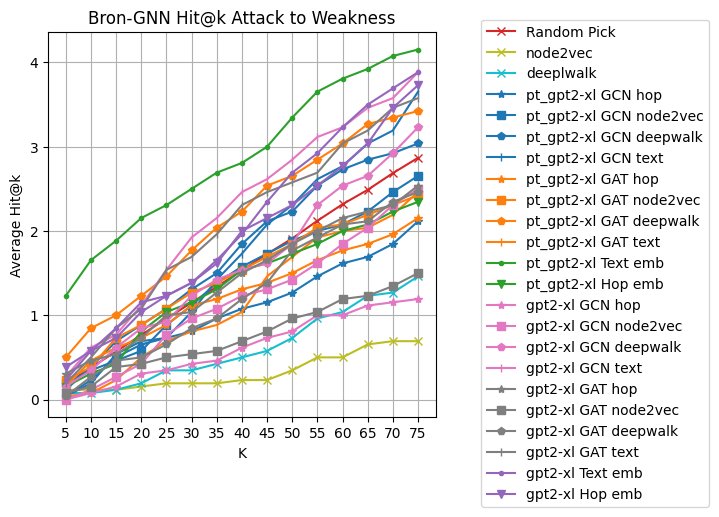

In [14]:
plot_hit_k_graph_gnn(bron_attack_cwe,rand_hit_k, text_matrix,hop_matrix, True, False, threshold)

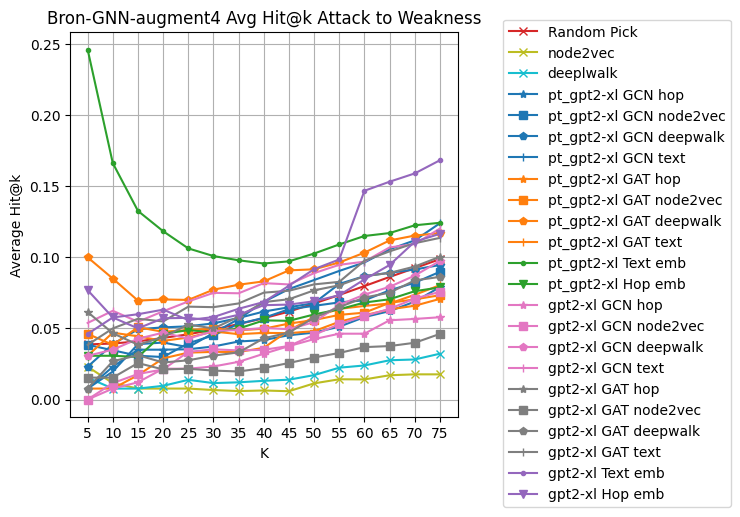

In [15]:
plot_hit_k_graph_gnn(bron_attack_cwe,rand_hit_k_avg, text_matrix,hop_matrix, True, True, threshold)

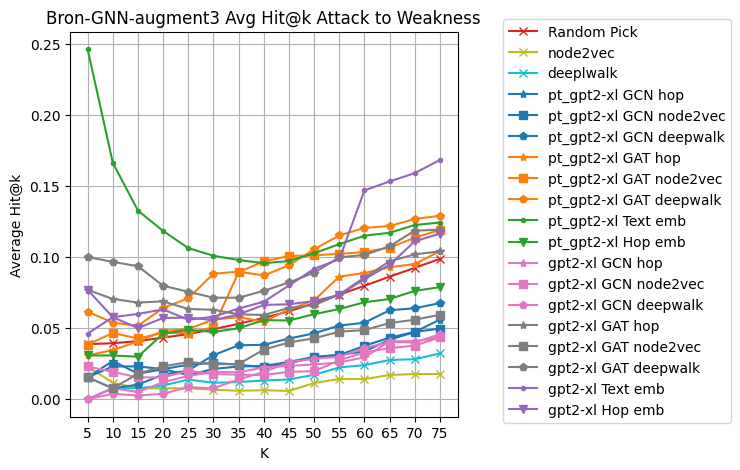

In [295]:
plot_hit_k_graph_gnn(bron_attack_cwe,rand_hit_k_avg, text_matrix,hop_matrix, True, True, threshold)

In [207]:
weakness_hop_sim_matrix = np.load(data_dir+'weakness_hop_sim_matrix.npy')
attack_hop_sim_matrix = np.load(data_dir+'attack_hop_sim_matrix.npy')

In [208]:
from scipy.stats import spearmanr
# Flatten the matrices
def get_spearman_rank_corr_graph(matrix1,matrix2, isAttack):
    cosine_matrix1 = matrix1
    if(isAttack):
        cosine_matrix2 = matrix2[:attack_size,:attack_size]
    else:
        cosine_matrix2 = matrix2[attack_size:,attack_size:]
    # print(cosine_matrix1.shape)
    # print(cosine_matrix2.shape)
    flat_cosine_sim_matrix1 = cosine_matrix1.flatten()
    flat_cosine_sim_matrix2 = cosine_matrix2.flatten()
    
    # Compute ranks for both arrays
    ranks1 = np.argsort(np.argsort(flat_cosine_sim_matrix1))
    ranks2 = np.argsort(np.argsort(flat_cosine_sim_matrix2))
    
    # Compute Spearman's rank correlation
    spearman_corr, _ = spearmanr(ranks1, ranks2)
    #print(f"Spearman's rank correlation: {spearman_corr}")
    return spearman_corr

In [209]:

for i,model in enumerate(models):
    
    print("Model: ", model)
    for j in range(len(gnn_models)):
        print("\tGNN: ", gnn_models[j])
        # gnn_hop_matrix.append(gnn_hop)
        # gnn_node2vec_matrix.append(gnn_node2vec)
        # gnn_deepwalk_matrix.append(gnn_deepwalk)
        spearman_corr = get_spearman_rank_corr_graph(attack_hop_sim_matrix,gnn_hop_matrix[i][j], True)
        print("\t\tText-Hop: ", spearman_corr)
        spearman_corr = get_spearman_rank_corr_graph(attack_hop_sim_matrix,gnn_node2vec_matrix[i][j], True)
        print("\t\tNode2vec: ", spearman_corr)
        spearman_corr = get_spearman_rank_corr_graph(attack_hop_sim_matrix,gnn_deepwalk_matrix[i][j], True)
        print("\t\tDeepwalk: ", spearman_corr)
    spearman_corr = get_spearman_rank_corr_graph(attack_hop_sim_matrix,text_matrix[i], True)
    print("\tText Embedding: ", spearman_corr)
    spearman_corr = get_spearman_rank_corr_graph(attack_hop_sim_matrix,hop_matrix[i], True)
    print("\tHop Embedding ", spearman_corr)
spearman_corr = get_spearman_rank_corr_graph(attack_hop_sim_matrix,node2vec_matrix, True)
print("Node2vec Embedding: ", spearman_corr)
spearman_corr = get_spearman_rank_corr_graph(attack_hop_sim_matrix,deepwalk_matrix, True)
print("Deepwalk Embedding ", spearman_corr)

Model:  pt_gpt2-xl
	GNN:  GCN
		Text-Hop:  0.17260353980381574
		Node2vec:  0.2507541372785885
		Deepwalk:  0.21026251443761154
	GNN:  GAT
		Text-Hop:  0.16907253813628104
		Node2vec:  0.19719549781182868
		Deepwalk:  0.18395826390980743
	Text Embedding:  0.19357704322490424
	Hop Embedding  0.4142122905457089
Model:  gpt2-xl
	GNN:  GCN
		Text-Hop:  0.16830589214694455
		Node2vec:  0.17402609857494472
		Deepwalk:  0.15637693758473034
	GNN:  GAT
		Text-Hop:  0.16037576692693267
		Node2vec:  0.14573054582379186
		Deepwalk:  0.14463392897458285
	Text Embedding:  0.19995798491742367
	Hop Embedding  0.4486922032901726
Node2vec Embedding:  0.7352571095955364
Deepwalk Embedding  0.7274502063046108


In [210]:
for i,model in enumerate(models):
    print("Model: ", model)
    for j in range(len(gnn_models)):
        print("\tGNN: ", gnn_models[j])
        # gnn_hop_matrix.append(gnn_hop)
        # gnn_node2vec_matrix.append(gnn_node2vec)
        # gnn_deepwalk_matrix.append(gnn_deepwalk)
        spearman_corr = get_spearman_rank_corr_graph(weakness_hop_sim_matrix,gnn_hop_matrix[i][j], False)
        print("\t\tText-Hop: ", spearman_corr)
        spearman_corr = get_spearman_rank_corr_graph(weakness_hop_sim_matrix,gnn_node2vec_matrix[i][j], False)
        print("\t\tNode2vec: ", spearman_corr)
        spearman_corr = get_spearman_rank_corr_graph(weakness_hop_sim_matrix,gnn_deepwalk_matrix[i][j], False)
        print("\t\tDeepwalk: ", spearman_corr)

    spearman_corr = get_spearman_rank_corr_graph(weakness_hop_sim_matrix,text_matrix[i], False)
    print("\tText Embedding: ", spearman_corr)
    spearman_corr = get_spearman_rank_corr_graph(weakness_hop_sim_matrix,hop_matrix[i], False)
    print("\tHop Embedding ", spearman_corr)
spearman_corr = get_spearman_rank_corr_graph(weakness_hop_sim_matrix,node2vec_matrix, False)
print("Node2vec: ", spearman_corr)
spearman_corr = get_spearman_rank_corr_graph(weakness_hop_sim_matrix,deepwalk_matrix, False)
print("Deepwalk ", spearman_corr)


Model:  pt_gpt2-xl
	GNN:  GCN
		Text-Hop:  0.07424710413131902
		Node2vec:  0.06154836155506741
		Deepwalk:  0.06921373327096154
	GNN:  GAT
		Text-Hop:  0.05678453685103569
		Node2vec:  0.06134318455704343
		Deepwalk:  0.05218292271377389
	Text Embedding:  0.1498346353266428
	Hop Embedding  0.5944292229093318
Model:  gpt2-xl
	GNN:  GCN
		Text-Hop:  0.13843453960894397
		Node2vec:  0.09156048457567503
		Deepwalk:  0.1059727061898296
	GNN:  GAT
		Text-Hop:  0.11103589521913498
		Node2vec:  0.08602953406788398
		Deepwalk:  0.08197825988401727
	Text Embedding:  0.20700689381711537
	Hop Embedding  0.6799303019006088
Node2vec:  0.5849911259606358
Deepwalk  0.41233486669743624


In [211]:
# Model:  pt_gpt2-xl
# 	GNN:  GCN
# 		Text-Hop:  0.05691957941130556
# 		Node2vec:  0.046283689576453214
# 		Deepwalk:  0.02929335192396631
# 	GNN:  GAT
# 		Text-Hop:  0.04299592786585551
# 		Node2vec:  0.0580184133855292
# 		Deepwalk:  0.039699012084110426
# 	Text Embedding:  0.13977680177744647
# 	Hop Embedding  0.6782165432750058
# Model:  gpt2-xl
# 	GNN:  GCN
# 		Text-Hop:  0.13394876952482562
# 		Node2vec:  0.06518387518123939
# 		Deepwalk:  0.06824858603385363
# 	GNN:  GAT
# 		Text-Hop:  0.0780712825631683
# 		Node2vec:  0.07706995218917329
# 		Deepwalk:  0.05856967960005807
# 	Text Embedding:  0.19218142378524133
# 	Hop Embedding  0.7252963728511547
# Node2vec:  0.78249515223141
# Deepwalk  0.7208223618262638

In [212]:
from scipy.stats import spearmanr
# Flatten the matrices
def get_spearman_rank_corr(matrix1,matrix2):
    flat_cosine_sim_matrix1 = matrix1.flatten()
    flat_cosine_sim_matrix2 = matrix2.flatten()
    
    # Compute ranks for both arrays
    ranks1 = np.argsort(np.argsort(flat_cosine_sim_matrix1))
    ranks2 = np.argsort(np.argsort(flat_cosine_sim_matrix2))
    
    # Compute Spearman's rank correlation
    spearman_corr, _ = spearmanr(ranks1, ranks2)
    #print(f"Spearman's rank correlation: {spearman_corr}")
    return spearman_corr

In [213]:
for i,model in enumerate(models):
    print("Model: ", model)
    for j in range(len(gnn_models)):
        print("\tGNN: ", gnn_models[j])
        # gnn_hop_matrix.append(gnn_hop)
        # gnn_node2vec_matrix.append(gnn_node2vec)
        # gnn_deepwalk_matrix.append(gnn_deepwalk)
        spearman_corr = get_spearman_rank_corr(text_matrix[i],gnn_hop_matrix[i][j])
        print("\t\tText-Hop: ", spearman_corr)
        spearman_corr = get_spearman_rank_corr(text_matrix[i],gnn_node2vec_matrix[i][j])
        print("\t\tNode2vec: ", spearman_corr)
        spearman_corr = get_spearman_rank_corr(text_matrix[i],gnn_deepwalk_matrix[i][j])
        print("\t\tDeepwalk: ", spearman_corr)
    spearman_corr = get_spearman_rank_corr(text_matrix[i],text_matrix[i])
    print("\tText Embedding: ", spearman_corr)
    spearman_corr = get_spearman_rank_corr(text_matrix[i],hop_matrix[i])
    print("\tHop Embedding ", spearman_corr)
    spearman_corr = get_spearman_rank_corr(text_matrix[i],node2vec_matrix)
    print("Node2vec Embedding: ", spearman_corr)
    spearman_corr = get_spearman_rank_corr(text_matrix[i],deepwalk_matrix)
    print("Deepwalk Embedding ", spearman_corr)

Model:  pt_gpt2-xl
	GNN:  GCN
		Text-Hop:  0.5322958799095541
		Node2vec:  0.44121432586633685
		Deepwalk:  0.4774523598621031
	GNN:  GAT
		Text-Hop:  0.5723338082205577
		Node2vec:  0.49149796669045354
		Deepwalk:  0.5167546394836487
	Text Embedding:  1.0
	Hop Embedding  0.6231146712193185
Node2vec Embedding:  0.20852802954370653
Deepwalk Embedding  0.2426520286635849
Model:  gpt2-xl
	GNN:  GCN
		Text-Hop:  0.5059728945289449
		Node2vec:  0.437075469821675
		Deepwalk:  0.47658334370515404
	GNN:  GAT
		Text-Hop:  0.5557372869265795
		Node2vec:  0.48348823882583664
		Deepwalk:  0.5214279924067943
	Text Embedding:  1.0
	Hop Embedding  0.5945463622749467
Node2vec Embedding:  0.26598364259421664
Deepwalk Embedding  0.289124798962702


In [ ]:
# Model:  pt_gpt2-xl
# 	GNN:  GCN
# 		Text-Hop:  0.5763740245208365
# 		Node2vec:  0.474097403309271
# 		Deepwalk:  0.4789984276171688
# 	GNN:  GAT
# 		Text-Hop:  0.6303656880113256
# 		Node2vec:  0.5616786255630906
# 		Deepwalk:  0.5606473439948815
# 	Text Embedding:  1.0
# 	Hop Embedding  0.7008013464659447
# Node2vec Embedding:  0.4513213738715633
# Deepwalk Embedding  0.15821678731865835
# Model:  gpt2-xl
# 	GNN:  GCN
# 		Text-Hop:  0.5770128934351003
# 		Node2vec:  0.486027615952666
# 		Deepwalk:  0.5048567652479259
# 	GNN:  GAT
# 		Text-Hop:  0.6037483876369719
# 		Node2vec:  0.5569079939584686
# 		Deepwalk:  0.5724040887787627
# 	Text Embedding:  0.9999999999999998
# 	Hop Embedding  0.7238500442717044
# Node2vec Embedding:  0.45558089268326263
# Deepwalk Embedding  0.1408571580014379

In [ ]:


# #models = ["pretrained_SecBert", "SecBert_E10", "pretrained_SecureBert",  "SecureBert_E10", "pretrained_Gpt2","Gpt2"]
# models = ["pretrained_SecBert", "SecBert_E5", "pretrained_SecureBert",  "SecureBert_E5", "pretrained_Gpt2","Gpt2_E5"]
# #models = ["pretrained_SecBert", "SecBert", "pretrained_SecureBert",  "SecureBert", "pretrained_Gpt2","Gpt2"]
# #models = ["pretrained_SecBert", "SecBert", "pretrained_SecureBert",  "SecureBert", "pretrained_Gpt2"]
# #models = ["Gpt2"]
# #models = ["pretrained_Gpt2","Gpt2_E5"]
# text_embeddings = []
# our_embeddings = []
# text_matrix = []
# our_emb_matrix = []
# for model in models:
#     text_embeddings.append(np.load(dir_name+model+"/data/all_embeddings.npy"))
#     our_embeddings.append(np.load(dir_name+model+"/data/our_embeddings.npy"))
#     text_matrix.append(cosine_similarity(text_embeddings[-1]))
#     our_emb_matrix.append(cosine_similarity(our_embeddings[-1]))


In [ ]:

# def plot_hit_k_graph(bron_attack_cwe,hop_matrices, text_matrices, isAttack):
    
#     # Initialize a dictionary to store average hit@k for each k
    
#     plt.figure(figsize=(5, 5))
#     # Loop over all the models
#     #models = ["pretrained_SecBert", "SecBert", "pretrained_SecureBert",  "SecureBert", "pretrained_Gpt2","Gpt2"]
#     #models = ["Gpt2"]
#     markers = ['o', 's', '^', 'v', '<', '>']
#     colors = list(mcolors.TABLEAU_COLORS)
#     if(isAttack):
#         size = attack_size
#     else:
#         size = weakness_size
#     all_hits = []
#     max_bron_weak=0
#     for j in range(0,len(models),1):
#         # Define the cosine similarity matrices
#         model = models[j]
#         if(isAttack):
#             hop_matrix = hop_matrices[j][:attack_size,attack_size:]
#             text_matrix = text_matrices[j][:attack_size,attack_size:]
#         else:
#             hop_matrix = hop_matrices[j][attack_size:,:attack_size]
#             text_matrix = text_matrices[j][attack_size:,:attack_size]
#         # Loop over each k from 10 to 1136
#         average_hit_with_hop = {}
#         average_hit_with_text = {}
#         # # Plot the results
#         average_hit_with_hop = calc_intersect(bron_attack_cwe, hop_matrix, isAttack)
#         average_hit_with_text = calc_intersect(bron_attack_cwe, text_matrix, isAttack)
#         #print(average_hit_with_hop)
#         ks = list(average_hit_with_hop.keys())
#         avg_hit_with_hop_val = list(average_hit_with_hop.values())
#         avg_hit_with_text_val = list(average_hit_with_text.values())
#         plt.plot(ks, avg_hit_with_text_val, label=model+" Text emb", marker='.', color = colors[j])
#         plt.plot(ks, avg_hit_with_hop_val, label=model+" Hop emb", marker='v',color = colors[j])
#     print(max_bron_weak)
#     plt.xlabel('k')
#     plt.ylabel('Average Hit@k')
#     plt.xticks(ks)
#     plt.grid(True)
#     plt.legend(bbox_to_anchor=(1.0, 1.0))
#     #plt.legend(loc="upper left")
#     if(isAttack):
#         plt.title('Average Hit@k Attack to Weakness')
#     else:
#         plt.title('Average Hit@k Weakness to Attack')
#     if(isAttack):
#         if(isAverage):
#             title = "avg_bron_hit@k_with_text_hop_attack_to_weak.png"
#         else:
#             title = "bron_hit@k_with_text_hop_attack_to_weak.png"
#     else:
#         if(isAverage):
#             title = "avg_bron_hit@k_with_text_hop_weak_to_attack.png"
#         else:
#             title = "bron_hit@k_with_text_hop_weak_to_attack.png"
#     plt.savefig(plot_dir+title, dpi=300, bbox_inches='tight')
#     plt.show()